In [204]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# LAB 8

## DOWNLOAD THE DATA

In [205]:
data = pd.read_csv('data/iris.data', header=None)

In [206]:
data = pd.read_csv('data/iris.data', header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [207]:
X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

In [208]:
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

## LDA

In [210]:
clf = LinearDiscriminantAnalysis()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print((y_test != y_pred).sum())

4


In [211]:
clf.score(X_test, y_test)

0.9466666666666667

In [212]:
def estimate_clf(clf):
    size_range = np.arange(0.05, 0.95, 0.05)
    test_results = []

    for size in size_range:
        X_train, X_test, y_train, y_test =\
            train_test_split(X, Y, test_size=size, random_state=630741)

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        fault = (y_test != y_pred).sum()
        score = clf.score(X_test, y_test) * 100

        test_results.append([size, fault, score])

    return np.array(test_results)

In [213]:
def show_result(clf, results, param = ''):
    plt.plot(results[:,0], results[:,1], label='# of faults')
    plt.plot(results[:,0], results[:,2], label='% of score')
    plt.title(clf.__name__)
    plt.legend()
    plt.show()

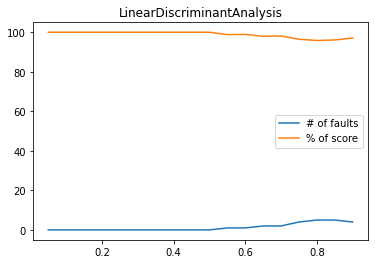

In [214]:
test_results = estimate_clf(LinearDiscriminantAnalysis())
show_result(LinearDiscriminantAnalysis, test_results)

In [215]:
x_pca = PCA(n_components=2).fit(X).transform(X)
x_lda = LinearDiscriminantAnalysis(n_components=2).fit(X, Y).transform(X)

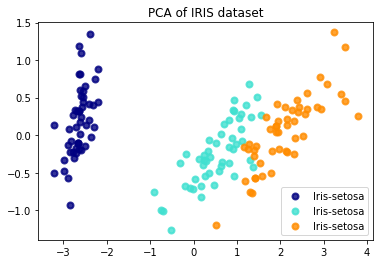

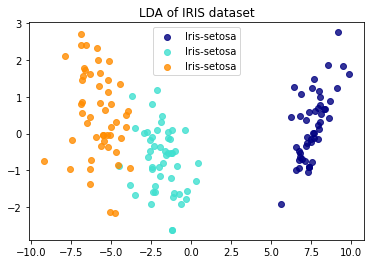

In [216]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], labels):
    plt.scatter(x_pca[Y == i, 0], x_pca[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], labels):
    plt.scatter(x_lda[Y == i, 0], x_lda[Y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

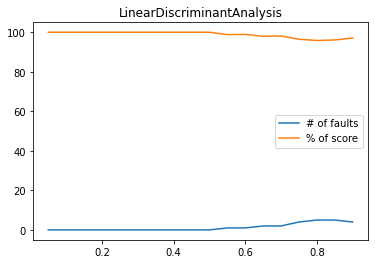

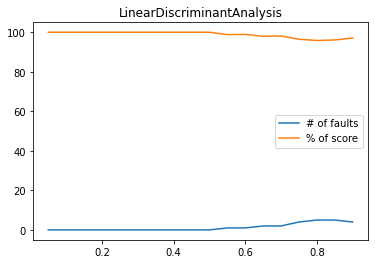

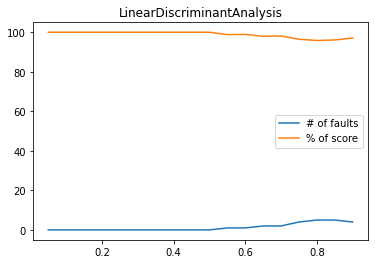

In [217]:
for solver in ['svd', 'lsqr', 'eigen']:
    test_results = estimate_clf(LinearDiscriminantAnalysis(solver=solver))
    show_result(LinearDiscriminantAnalysis, test_results)

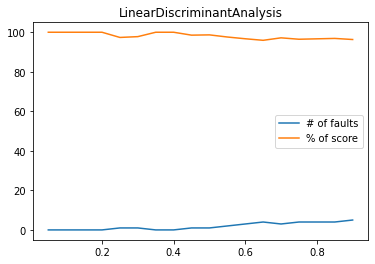

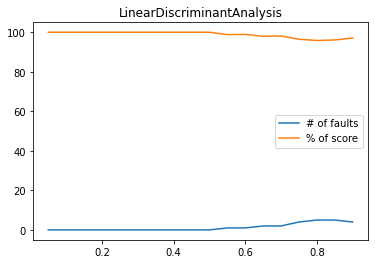

In [218]:
for shrinkage in ['auto', None]:
    test_results = estimate_clf(LinearDiscriminantAnalysis(shrinkage=shrinkage, solver='lsqr'))
    show_result(LinearDiscriminantAnalysis, test_results)

In [219]:
priors = np.zeros(len(set(labels)))
priors[0] = 0.7
priors[1:] = 0.3 / (len(set(labels)) - 1)
priors

array([0.7 , 0.15, 0.15])

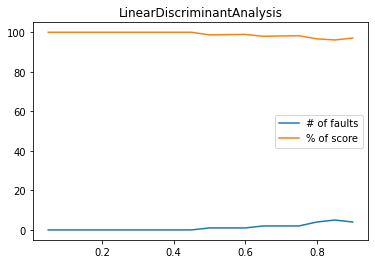

In [220]:
test_results = estimate_clf(LinearDiscriminantAnalysis(priors=priors))
show_result(LinearDiscriminantAnalysis, test_results)

## SVM

In [221]:
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test!= y_pred).sum())
print(clf.score(X, Y))

2
0.9733333333333334


In [222]:
clf.score(X_test, y_test)

0.9733333333333334

In [223]:
print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

[[5.1 3.8 1.9 0.4]
 [5.1 3.3 1.7 0.5]
 [5.  3.5 1.6 0.6]
 [4.8 3.4 1.9 0.2]
 [5.4 3.4 1.5 0.4]
 [5.9 3.  4.2 1.5]
 [5.6 3.  4.1 1.3]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [6.1 2.8 4.7 1.2]
 [6.3 3.3 4.7 1.6]
 [6.  2.9 4.5 1.5]
 [5.1 2.5 3.  1.1]
 [6.2 2.9 4.3 1.3]
 [5.2 2.7 3.9 1.4]
 [6.7 3.1 4.7 1.5]
 [5.5 2.4 3.7 1. ]
 [6.  3.4 4.5 1.6]
 [6.3 2.3 4.4 1.3]
 [6.6 2.9 4.6 1.3]
 [5.7 2.6 3.5 1. ]
 [6.3 2.5 4.9 1.5]
 [5.6 2.9 3.6 1.3]
 [6.7 3.  5.  1.7]
 [6.  2.7 5.1 1.6]
 [6.3 2.7 4.9 1.8]
 [5.8 2.7 5.1 1.9]
 [5.8 2.7 5.1 1.9]
 [5.9 3.  5.1 1.8]
 [6.5 3.2 5.1 2. ]
 [6.4 2.7 5.3 1.9]
 [7.7 3.8 6.7 2.2]
 [6.4 3.1 5.5 1.8]
 [6.2 2.8 4.8 1.8]
 [7.2 3.  5.8 1.6]
 [6.4 3.2 5.3 2.3]
 [6.9 3.1 5.4 2.1]
 [5.7 2.5 5.  2. ]
 [5.8 2.8 5.1 2.4]
 [6.9 3.1 5.1 2.3]
 [5.6 2.8 4.9 2. ]]
[14 22 48 51 68  4  6  8 15 17 25 26 27 28 34 40 41 47 50 58 60 61 63 67
 72  0  3  7  9 10 16 19 36 43 46 54 56 59 64 65 73]
[ 5 20 16]


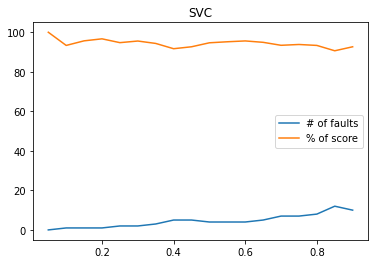

In [224]:
test_results = estimate_clf(svm.SVC())
show_result(svm.SVC, test_results)

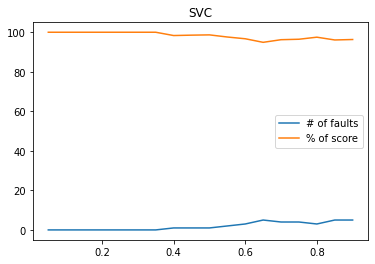

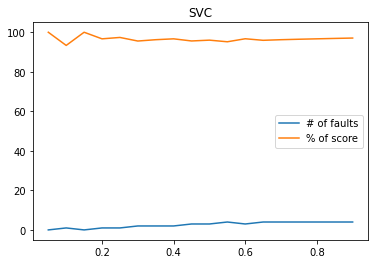

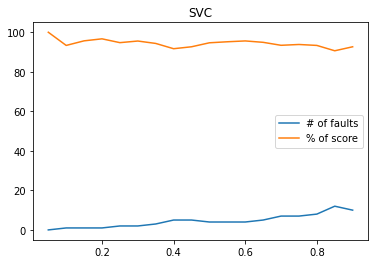

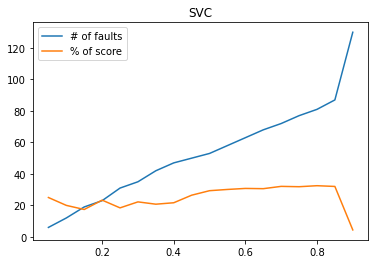

In [225]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    test_results = estimate_clf(svm.SVC(kernel=kernel))
    show_result(svm.SVC, test_results)

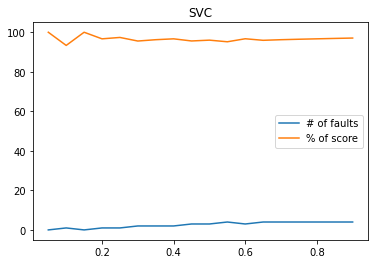

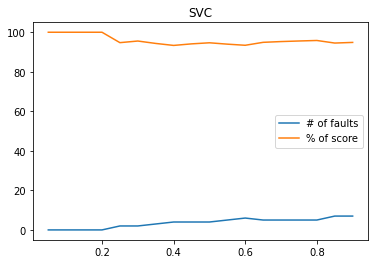

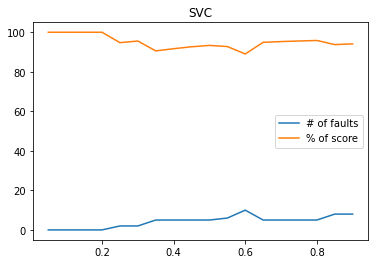

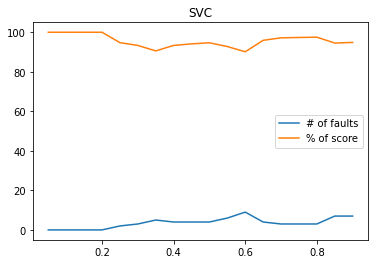

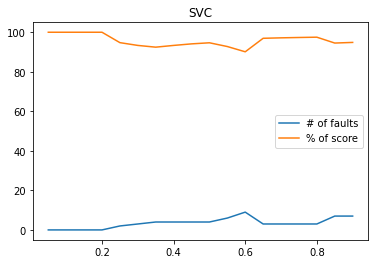

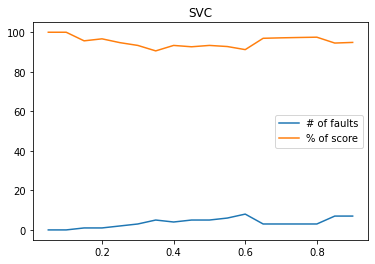

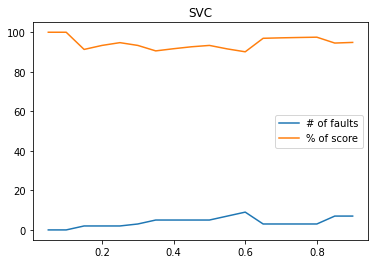

In [226]:
for degree in range(3, 10):
    test_results = estimate_clf(svm.SVC(kernel='poly', degree=degree))
    show_result(svm.SVC, test_results)

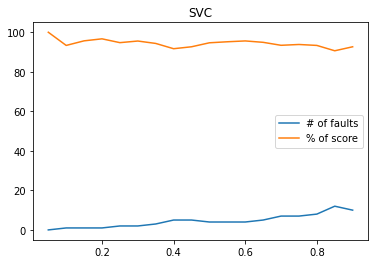

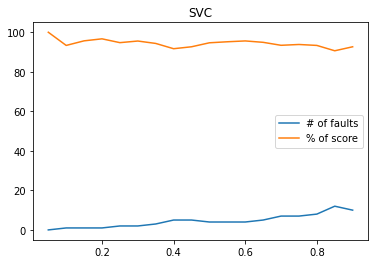

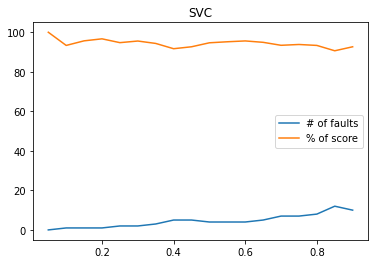

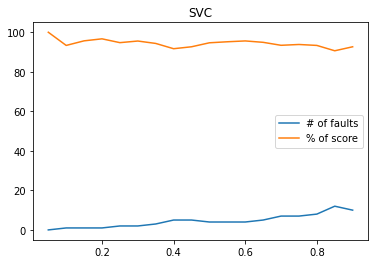

In [227]:
for max_iter in [-1, 40, 200, 300]:
    test_results = estimate_clf(svm.SVC(max_iter=max_iter))
    show_result(svm.SVC, test_results)

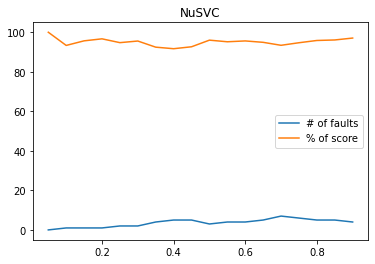

/home/master/PycharmProjects/ml_course/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/master/PycharmProjects/ml_course/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/master/PycharmProjects/ml_course/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/master/PycharmProjects/ml_course/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/master/PycharmProjects/ml_cour

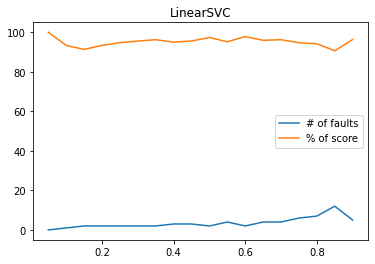

In [228]:
for svc in [svm.NuSVC, svm.LinearSVC]:
    test_results = estimate_clf(svc())
    show_result(svc, test_results)